# Testing Envelopes on Data Samples

In [1]:
# Some useful modules for notebooks
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 3]
mpl.rcParams['figure.dpi'] = 300

from tqdne.conf import DATASETDIR
import numpy as np
datapath = DATASETDIR / Path("waveforms.npy")

In [3]:
print(DATASETDIR)

/users/fmachado/data/japan


In [4]:
wfs = np.load(datapath)
wfs.shape

(52076, 1000)

In [5]:
def _rolling_window(x, window_len, step_length = 1):
    pos = 0
    while pos <= len(x) - window_len:
        yield x[pos : pos+window_len]
        pos += step_length

def _centered_window(x, window_len):
    assert window_len % 2, 'Centered Window has to have odd length'
    mid = window_len // 2
    pos = 0
    while pos < len(x):
        yield x[max(pos - mid, 0): min(pos + mid + 1, len(x))]
        pos += 1

def centered_max(x, window_len):
    out = [window.max() for window in _centered_window(x, window_len)]
    return np.array(out)

def p_mean(x, window_len, p = 5):
    out = []
    for window in _centered_window(x, window_len):
        out.append(np.float_power(np.mean(window ** p), 1/p))
    return np.array(out)


In [6]:
p_mean(np.array([1,2,3,4,5,6,7,8,9]), 3, 2)

array([1.58113883, 2.1602469 , 3.10912635, 4.0824829 , 5.06622805,
       6.05530071, 7.04745817, 8.04155872, 8.51469318])

In [7]:
def plot_signal_envelope(raw_signal, envelope):
    signal = raw_signal / envelope
    fig, ax = plt.subplots(1, 2)
    ax[0].title.set_text("Envelope and Signal")
    ax[0].plot(raw_signal)
    ax[0].plot(envelope)
    ax[1].title.set_text("Signal scaled by Envelope")
    ax[1].plot(signal)
    plt.show()


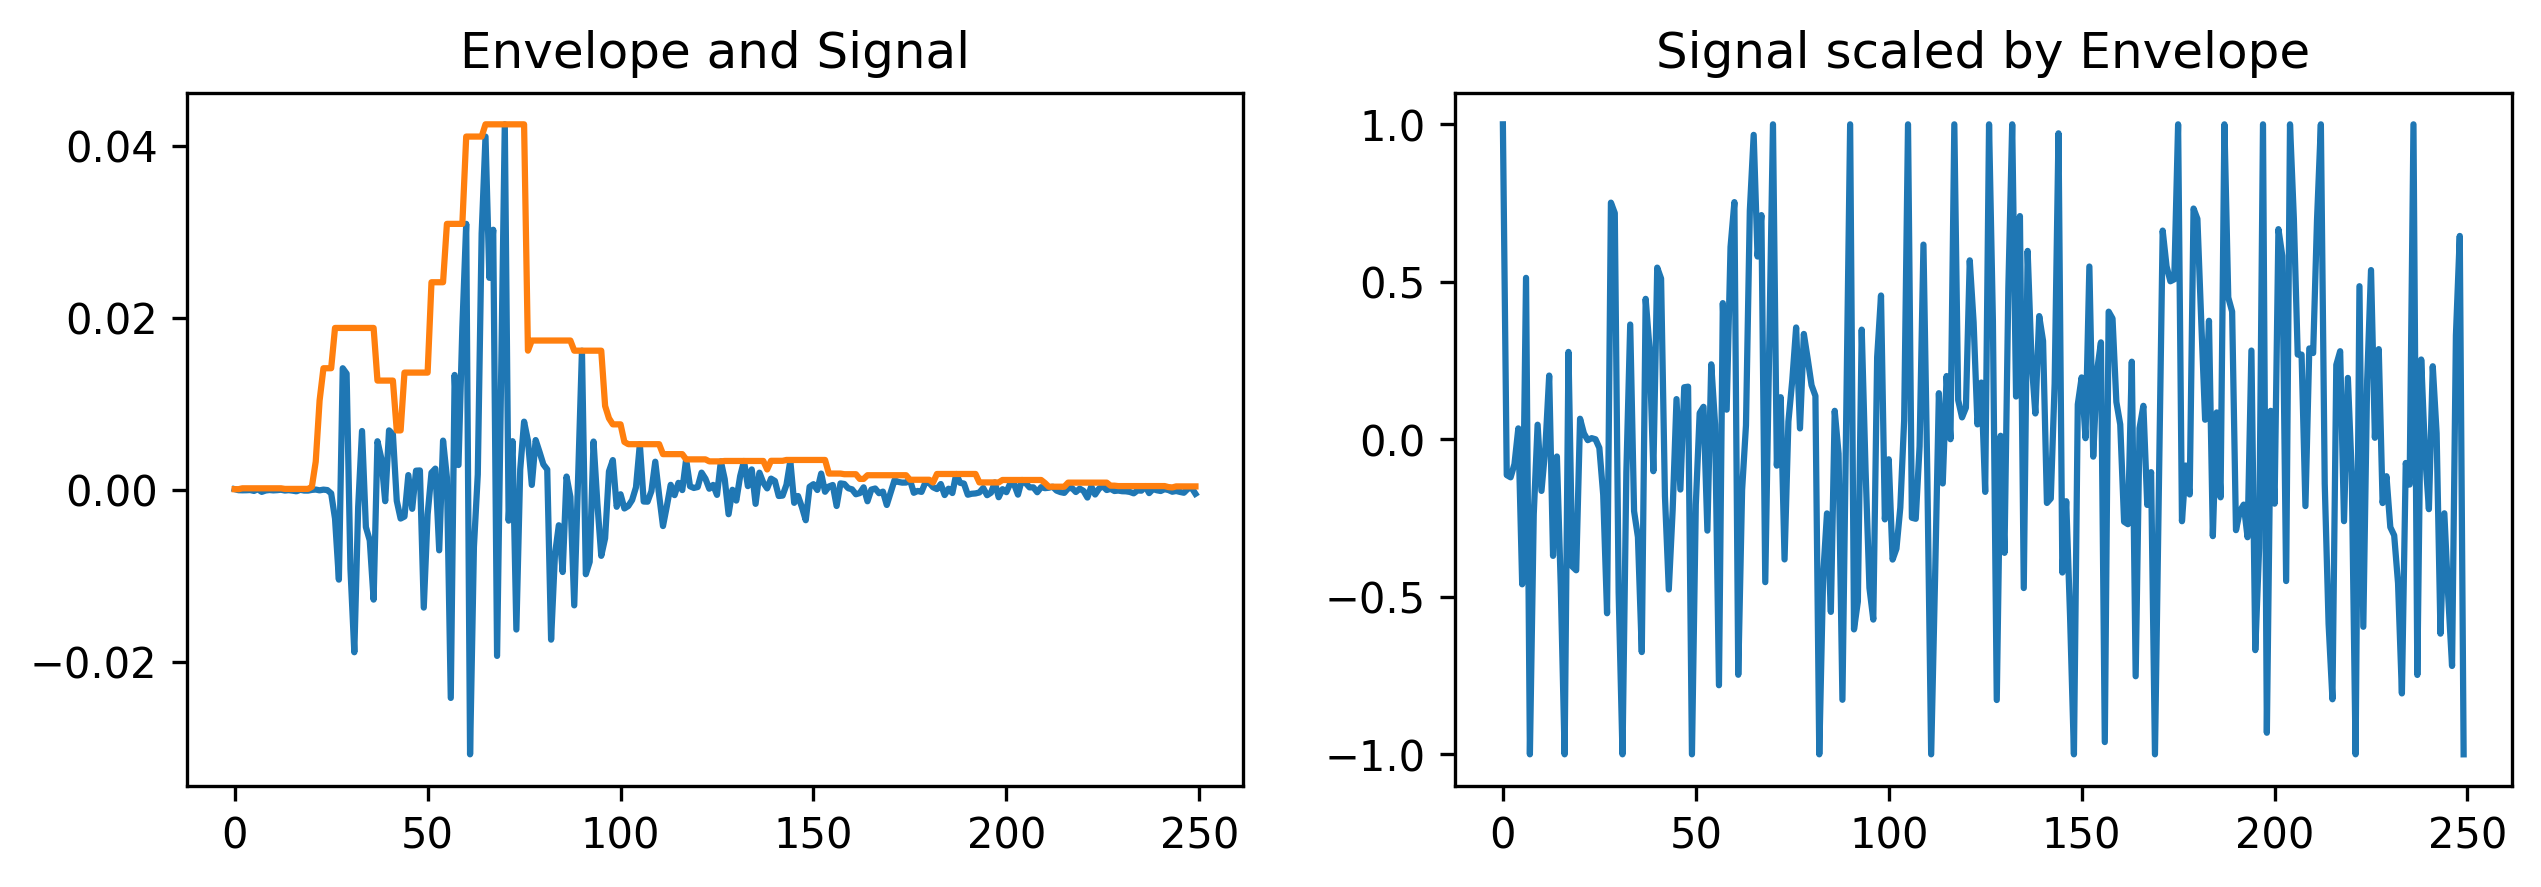

In [8]:
raw_signal = wfs[1][::4]
envelope = centered_max(np.abs(raw_signal), window_len=11)
plot_signal_envelope(raw_signal, envelope)

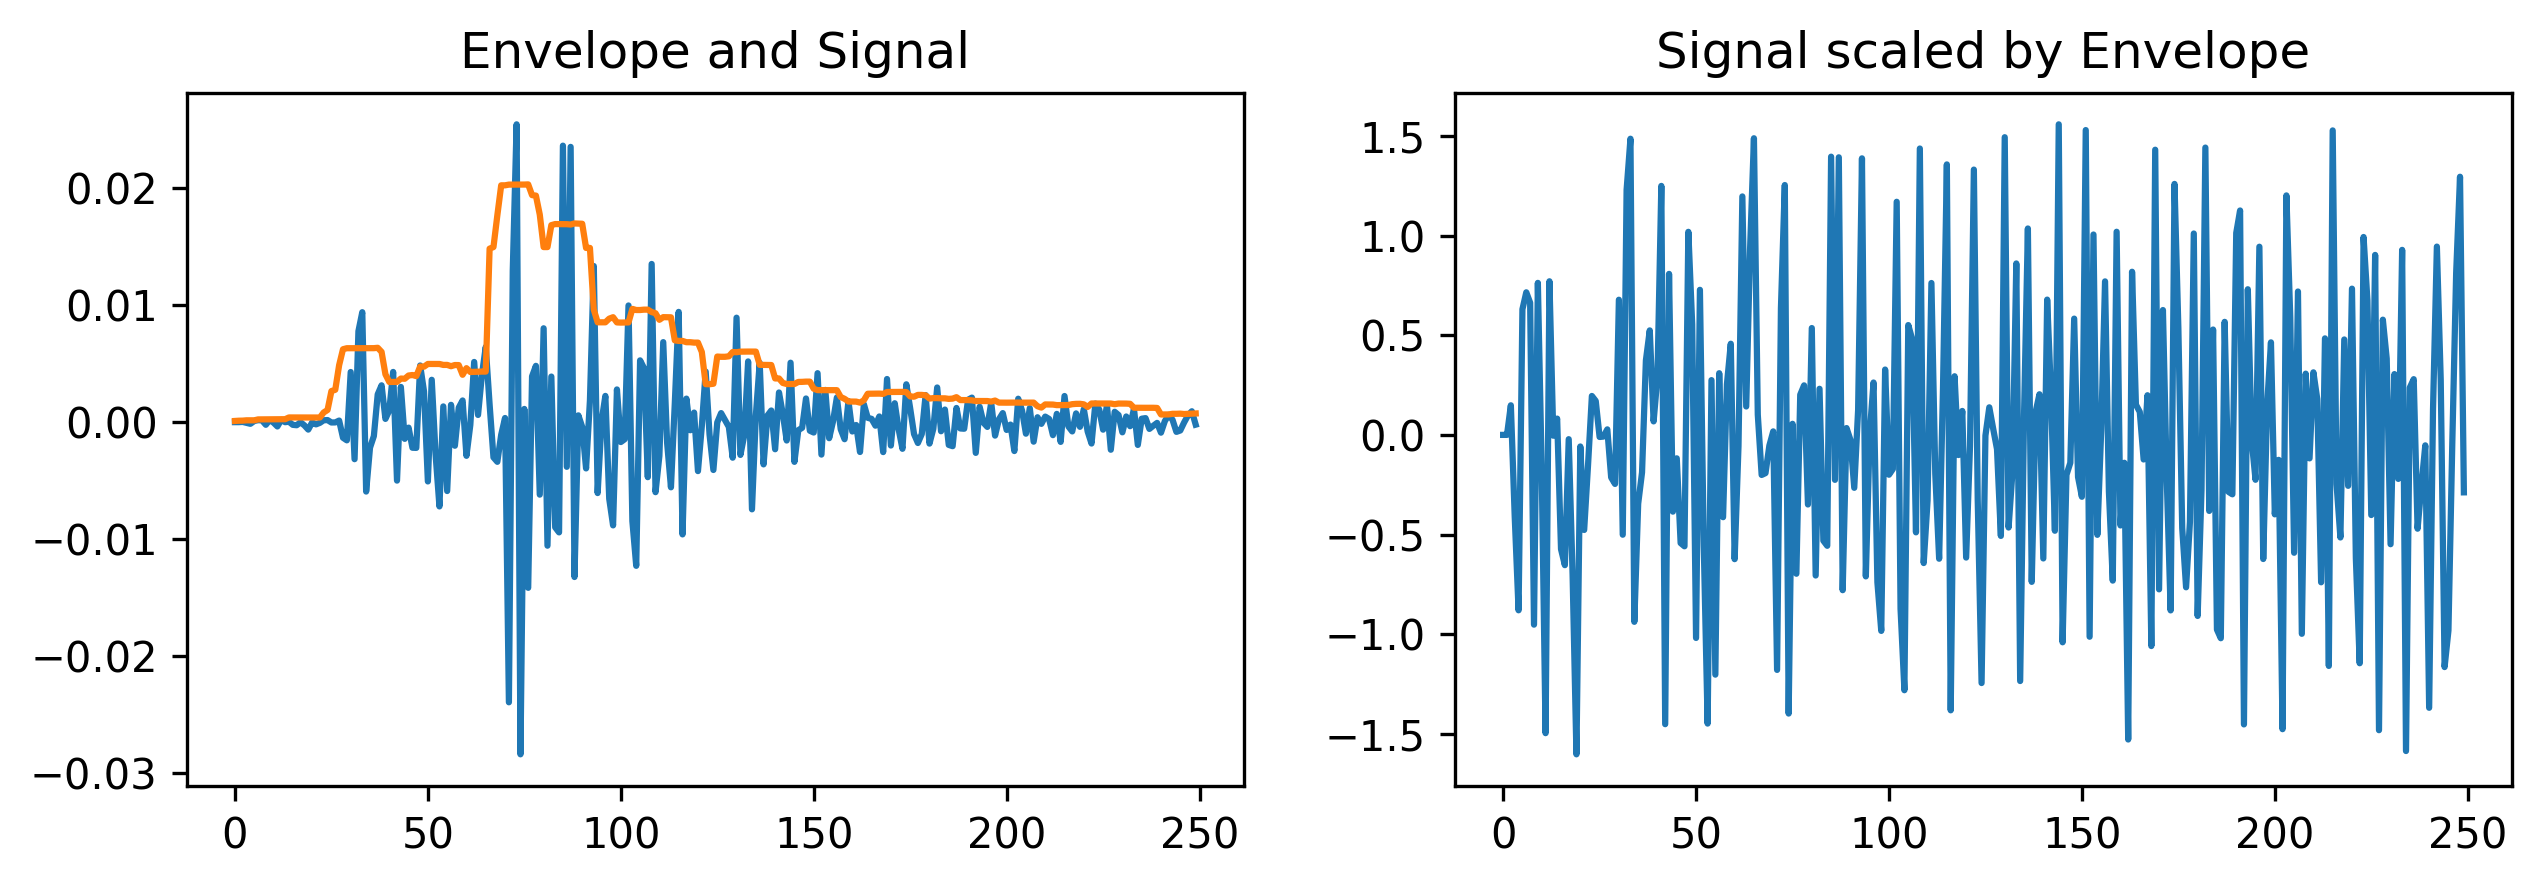

In [9]:
raw_signal = wfs[0][::4]
envelope = p_mean(np.abs(raw_signal), window_len=11, p=5)
plot_signal_envelope(raw_signal, envelope)

In [10]:
def signal_transform(raw_signal, eps = 1e-6, window_len=21, p = 3):
    magnitude = np.abs(raw_signal) + eps
    envelope = p_mean(magnitude, window_len, p)
    log_envelope = np.log10(envelope) / 10
    oscilation = raw_signal / magnitude
    return log_envelope, oscilation

log_env, osc = signal_transform(wfs[0])

# def signal_inverse_transform(log_enve)

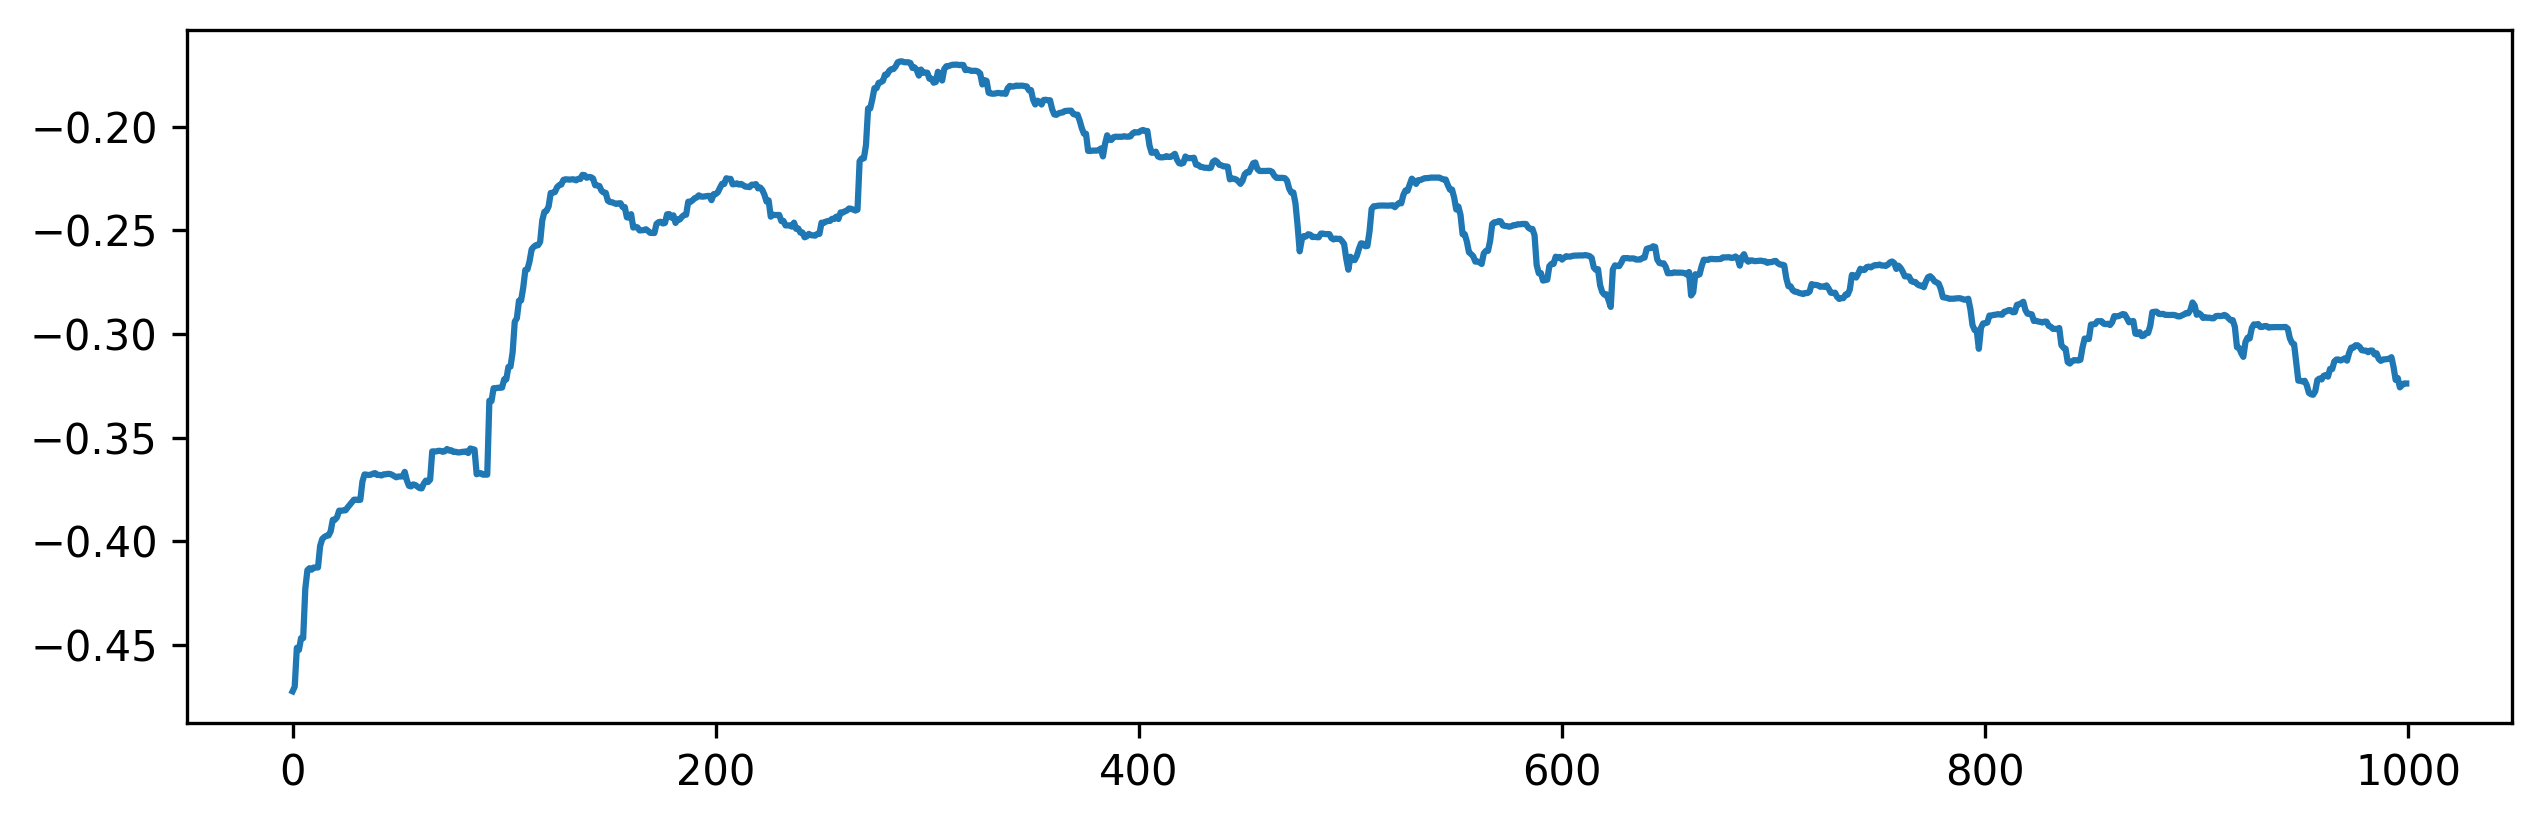

In [11]:
plt.plot(log_env)